In [1]:
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt
from __future__ import print_function
import statsmodels.api as st
import scipy as sp 
from scipy import stats
import statsmodels.formula.api as smf

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/rspd/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
xls = pd.ExcelFile("https://github.com/jkastelan/iHeartCUSPhackDay2017/raw/master/FINAL-GSI-2016-GLOBAL-DATA-TABLE_FOR-NON-COMMERCIAL-USE-1512059661.xlsx", skiprows=1)
df = xls.parse('GLOBAL DATA 2016 GSI', skiprows=1)
df

,Country,REGION,Dimension 1: Political Rights and Safety,Dimension 2: Financial and Health Protections,Dimension 3: Protection for the Most Vulnerable,Dimension 4: Conflict,Mean Vulnerability,POPULATION,ESTIMATED PROPORTION OF POPULATION IN MODERN SLAVERY,ESTIMATED NUMBER IN MODERN SLAVERY,...,Milestone 3: Coordination and accountability (/14),Milestone 3: Coordination and accountability (%),Milestone 4: Addressing risk (/25),Milestone 4: Addressing risk (%),Milestone 5: Investigating supply chains (/7),Milestone 5: Investigating supply chains (%),Total score (/100),Corruption or state sanctioned forced labour score (/-2),Total score (U-V),CREDIT rating
0,Afghanistan,ASIA,83.00,47.39,53.31,84.55,67.06,32527000.0,1.130009,367600.0,...,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data
1,Albania,EUROPE,52.88,29.58,42.36,18.25,35.77,2906000.0,0.294603,8600.0,...,6.25,43.75,15.4762,61.9048,0,0,55.3373,-1,54.3373,BB
2,Algeria,MIDDLE EAST AND NORTH AFRICA,51.03,28.10,47.02,51.46,44.40,39667000.0,0.626048,248300.0,...,3.57143,25,10.7143,42.8571,0,0,28.6111,-1,27.6111,CC
3,Angola,SUBSAHARAN AFRICA,56.32,49.54,45.95,25.02,44.21,25022000.0,0.638397,159700.0,...,4.46429,31.25,7.14286,28.5714,0,0,22.5198,-1,21.5198,CC
4,Argentina,AMERICAS,35.63,18.50,34.04,25.36,28.38,43417000.0,0.404285,175500.0,...,12.5,87.5,19.6429,78.5714,0,0,60.7937,-1,59.7937,BB
5,Armenia,RUSSIA AND EURASIA,53.66,27.38,42.63,24.90,37.14,3018000.0,0.466854,14100.0,...,8.03571,56.25,12.5,50,0,0,46.746,-1,45.746,B
6,Australia,ASIA,15.14,19.85,17.45,35.49,21.98,23772000.0,0.018000,4300.0,...,8.03571,56.25,17.2619,69.0476,1.78571,25,65.3373,0,65.3373,BBB
7,Austria,EUROPE,21.47,18.14,14.05,33.14,21.70,8566000.0,0.018000,1500.0,...,9.82143,68.75,19.0476,76.1905,0,0,60.1587,0,60.1587,BBB
8,Azerbaijan,RUSSIA AND EURASIA,68.90,28.23,28.17,23.05,37.09,9635000.0,0.466854,45000.0,...,2.67857,18.75,14.2857,57.1429,0,0,39.0079,-1,38.0079,CCC
9,Bahrain,MIDDLE EAST AND NORTH AFRICA,54.41,33.14,41.45,31.26,40.07,1377000.0,0.466854,6400.0,...,3.57143,25,8.92857,35.7143,0,0,32.1429,-1,31.1429,CCC


In [3]:
df['Country'] = df['Country'].str.replace('Guyana', 'French Guiana')
#df['Country'] = df['Country'].str.replace('Iran', 'Iran (Islamic Republic of)')
df['Country'] = df['Country'].str.replace('Ivory Coast', "Cote d'Ivoire")
df['Country'] = df['Country'].str.replace('Laos', "Lao People's Democratic Republic")
df['Country'] = df['Country'].str.replace('Libya', 'Libyan Arab Jamahirlya')
df['Country'] = df['Country'].str.replace('Macedonia', 'The former Yugoslav Republic of Macedonia')
df['Country'] = df['Country'].str.replace('Moldova', 'Republic of Moldova')
df['Country'] = df['Country'].str.replace('Myanmar', 'Burma')
df['Country'] = df['Country'].str.replace('North Korea', "Korea, Democratic People's Republic of")
df['Country'] = df['Country'].str.replace('South Korea', 'Korea, Republic of')
df['Country'] = df['Country'].str.replace('Syria', 'Syrian Arab Republic')
df['Country'] = df['Country'].str.replace('Tanzania', 'United Republic of Tanzania')
df['Country'] = df['Country'].str.replace('Vietnam', 'Viet Nam')

In [4]:
df.columns

Index([u'Country', u'REGION', u'Dimension 1: Political Rights and Safety',
       u'Dimension 2: Financial and Health Protections',
       u'Dimension 3: Protection for the Most Vulnerable',
       u'Dimension 4: Conflict', u'Mean Vulnerability ', u'POPULATION',
       u'ESTIMATED PROPORTION OF POPULATION IN MODERN SLAVERY',
       u'ESTIMATED NUMBER IN MODERN SLAVERY', u'GOVERNMENT RESPONSE RANK',
       u'Milestone 1: Victims are supported to exit slavery (/32)',
       u'Milestone 1: Victims are supported to exit slavery (%)',
       u'Milestone 2: Criminal justice responses (/21)',
       u'Milestone 2: Criminal justice responses (%)',
       u'Milestone 3: Coordination and accountability (/14)',
       u'Milestone 3: Coordination and accountability (%)',
       u'Milestone 4: Addressing risk (/25)',
       u'Milestone 4: Addressing risk (%)',
       u'Milestone 5: Investigating supply chains (/7)',
       u'Milestone 5: Investigating supply chains (%)', u'Total score (/100)',
    

In [5]:
df_reg = df[['ESTIMATED NUMBER IN MODERN SLAVERY', 'REGION']]

In [6]:
df_reg.groupby('REGION').sum()

,ESTIMATED NUMBER IN MODERN SLAVERY
REGION,
AMERICAS,2168600.0
ASIA,30435300.0
EUROPE,1243400.0
MIDDLE EAST AND NORTH AFRICA,2936800.0
RUSSIA AND EURASIA,2809700.0
SUBSAHARAN AFRICA,6245800.0


In [7]:
df.shape

(170, 25)

In [8]:
int(df['ESTIMATED NUMBER IN MODERN SLAVERY'].sum())

45839600

In [9]:
df_ = df
df_['Country'] = df_['Country'].str.replace('Democratic Republic of the Congo', 'Dem. Rep. of Congo')
df_['Country'] = df_['Country'].str.replace("Korea, Democratic People's Republic of", 'North Korea')
df_['Country'] = df_['Country'].str.replace('Libyan Arab Jamahirlya', 'Libya')
df_['Country'] = df_['Country'].str.replace('Syrian Arab Republic', 'Syria')
#df_['Country'] = df_['Country'].str.replace("Iran (Islamic Republic of)", 'Iran')

In [10]:
df2 = df_[['Country', 'ESTIMATED PROPORTION OF POPULATION IN MODERN SLAVERY', 'POPULATION']]
df2.sort_values('ESTIMATED PROPORTION OF POPULATION IN MODERN SLAVERY', ascending=False)

df3 = df_[['Country', 'ESTIMATED NUMBER IN MODERN SLAVERY', 'POPULATION']]
df3 = df3.sort_values('ESTIMATED NUMBER IN MODERN SLAVERY', ascending=False)

In [11]:
df2['ESTIMATED PROPORTION OF POPULATION IN MODERN SLAVERY'].mean()

0.537874308849923

In [12]:
df2 = df2.dropna()
df2_top20 = df2.nlargest(20, columns='ESTIMATED PROPORTION OF POPULATION IN MODERN SLAVERY')
df2_top20

df3 = df3.dropna()
df3_top20 = df3.nlargest(20, columns='ESTIMATED NUMBER IN MODERN SLAVERY')

In [13]:
df2_top20

,Country,ESTIMATED PROPORTION OF POPULATION IN MODERN SLAVERY,POPULATION
110,North Korea,4.372888,2.515500e+07
161,Uzbekistan,3.972895,3.112500e+07
23,Cambodia,1.648241,1.557800e+07
65,India,1.400000,1.311051e+09
121,Qatar,1.356000,2.235000e+06
0,Afghanistan,1.130009,3.252700e+07
27,Central African Republic,1.130009,4.900000e+06
37,Dem. Rep. of Congo,1.130009,7.726700e+07
68,Iraq,1.130009,3.573000e+07
86,Libya,1.130009,6.278000e+06


In [14]:
df3_top20

,Country,ESTIMATED NUMBER IN MODERN SLAVERY,POPULATION
65,India,18354700.0,1.311051e+09
30,China,3388400.0,1.371738e+09
113,Pakistan,2134900.0,1.889250e+08
10,Bangladesh,1531300.0,1.609960e+08
161,Uzbekistan,1236600.0,3.112500e+07
110,North Korea,1100000.0,2.515500e+07
124,Russia,1048500.0,1.433350e+08
109,Nigeria,875500.0,1.822020e+08
37,Dem. Rep. of Congo,873100.0,7.726700e+07
66,Indonesia,736100.0,2.575640e+08


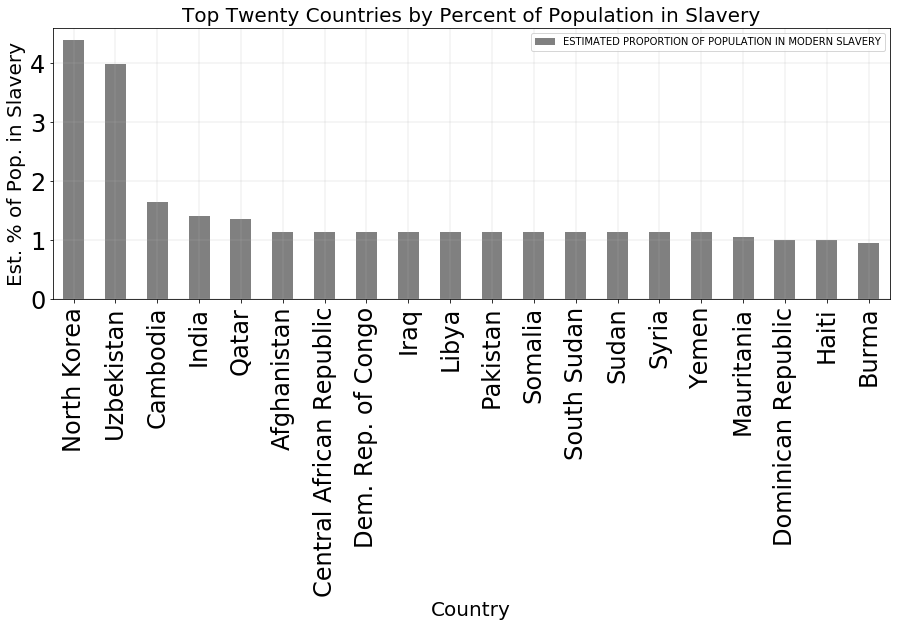

In [15]:
df2_top20.plot(x='Country', y='ESTIMATED PROPORTION OF POPULATION IN MODERN SLAVERY', 
               kind="bar", figsize=(15,5), fontsize=24, color='grey')
plt.xlabel('Country', fontsize='20')
plt.ylabel('Est. % of Pop. in Slavery', fontsize=20)
plt.title('Top Twenty Countries by Percent of Population in Slavery', fontsize=20)
plt.grid(linewidth=0.25)

##### Fig 1. Bar chart of the top twenty countries by estimated proportion of population in modern slavery 

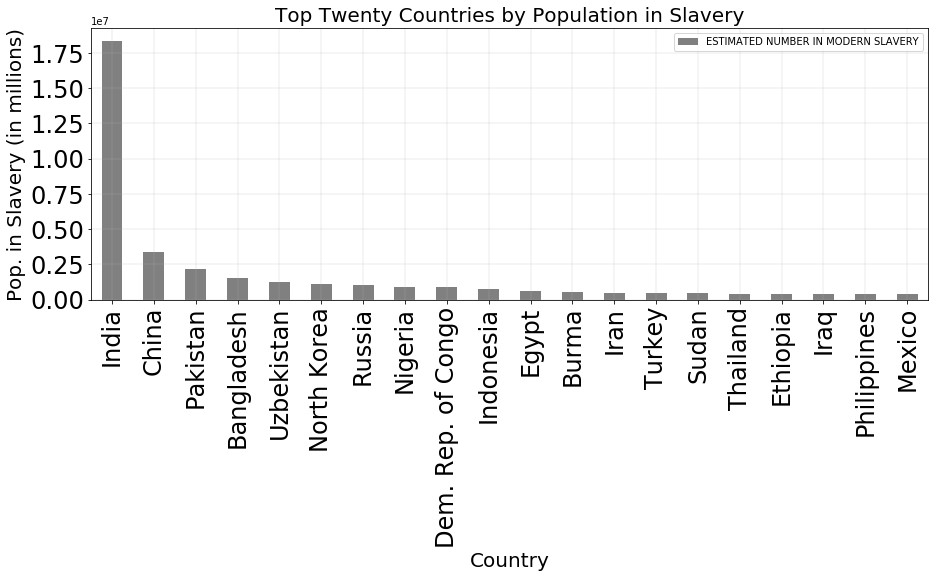

In [16]:
df3_top20.plot(x='Country', y='ESTIMATED NUMBER IN MODERN SLAVERY', 
               kind="bar", figsize=(15,5), fontsize=24, color='gray')
plt.xlabel('Country', fontsize='20')
plt.ylabel('Pop. in Slavery (in millions)', fontsize=20)
plt.title('Top Twenty Countries by Population in Slavery', fontsize=20)
plt.grid(linewidth=0.25)

##### Fig 2. Bar chart of the top twenty countries by total estimated number of people in slavery. 

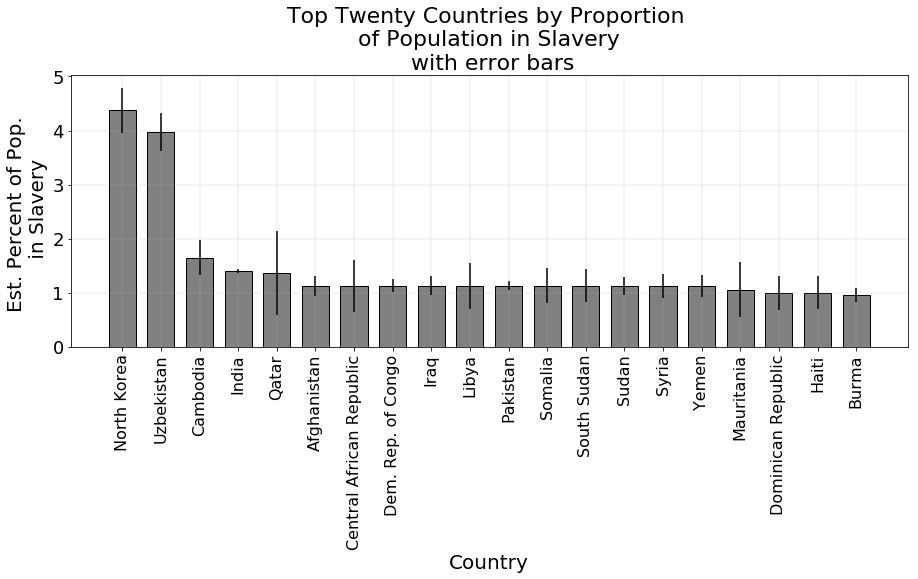

In [17]:
labels, values, errbar  = df2_top20['Country'], df2_top20['ESTIMATED PROPORTION OF POPULATION IN MODERN SLAVERY'], np.sqrt(df2_top20['ESTIMATED PROPORTION OF POPULATION IN MODERN SLAVERY'] / df2_top20['POPULATION']) * 1e3

indexes = np.arange(len(labels))
width = 0.7

ax = pl.figure(figsize(15,5)).add_subplot(111)

pl.tick_params(axis='both',labelsize=18)
pl.bar(indexes, values, width, yerr = errbar, edgecolor='black', color='gray')
pl.grid(linewidth=0.25)
pl.xticks(indexes, labels, rotation=90 , fontsize = 16) #indexes + width * 0.5
pl.title("Top Twenty Countries by Proportion \n of Population in Slavery \n with error bars", fontsize = 22)
pl.xlabel("Country", fontsize = 20)
pl.ylabel("Est. Percent of Pop. \n in Slavery", fontsize = 20)
pl.show()

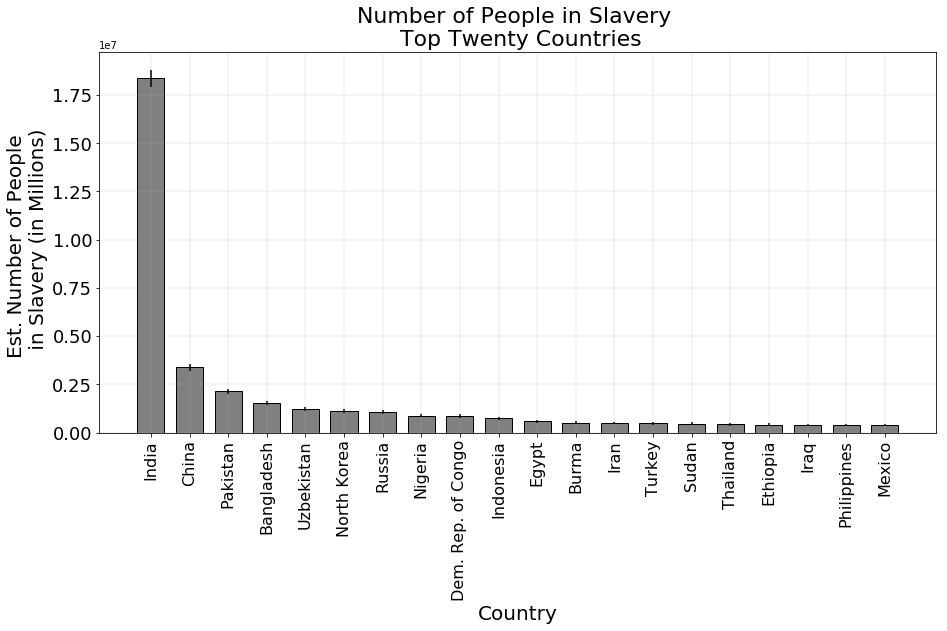

In [18]:
labels, values, errbar  = df3_top20['Country'], df3_top20['ESTIMATED NUMBER IN MODERN SLAVERY'], \
np.sqrt(df3_top20['ESTIMATED NUMBER IN MODERN SLAVERY']) * 1e2

indexes = np.arange(len(labels))
width = 0.7

ax = pl.figure(figsize(15,7)).add_subplot(111)

pl.tick_params(axis='both',labelsize=18)
pl.bar(indexes, values, width, yerr = errbar, edgecolor='black', color='gray')
plt.grid(linewidth=0.25)

pl.xticks(indexes, labels, rotation=90 , fontsize = 16) #indexes + width * 0.5
pl.title("Number of People in Slavery \n Top Twenty Countries", fontsize = 22)
pl.xlabel("Country", fontsize = 20)
pl.ylabel("Est. Number of People \n in Slavery (in Millions)", fontsize = 20)
pl.show()

In [19]:
df_credit = df[['Country', 'CREDIT rating', 'ESTIMATED PROPORTION OF POPULATION IN MODERN SLAVERY']]
df_credit.sort_values('ESTIMATED PROPORTION OF POPULATION IN MODERN SLAVERY', ascending=False)

,Country,CREDIT rating,ESTIMATED PROPORTION OF POPULATION IN MODERN SLAVERY
110,North Korea,D,4.372888
161,Uzbekistan,CC,3.972895
23,Cambodia,CCC,1.648241
65,India,B,1.400000
121,Qatar,CCC,1.356000
139,Sudan,CC,1.130009
68,Iraq,no data,1.130009
86,Libya,no data,1.130009
37,Dem. Rep. of Congo,C,1.130009
27,Central African Republic,C,1.130009


In [20]:
creditscores = pd.read_csv("creditscores.csv")
creditscores.head()

,Country,CREDIT rating,ESTIMATED PROPORTION OF POPULATION IN MODERN SLAVERY
0,Afghanistan,0,1.130009
1,Algeria,0,0.626048
2,Brunei,0,0.805252
3,Burundi,0,0.638397
4,Central African Republic,0,1.130009


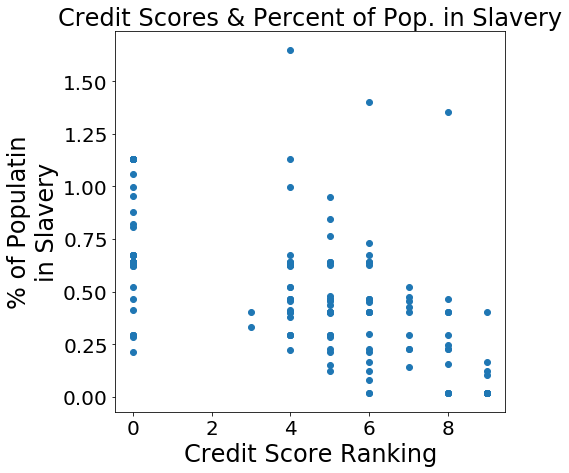

In [21]:
#Removes top two (outliers)


filt_credit = creditscores[(creditscores['ESTIMATED PROPORTION OF POPULATION IN MODERN SLAVERY'] < 3)]

y = filt_credit['ESTIMATED PROPORTION OF POPULATION IN MODERN SLAVERY']
x = filt_credit['CREDIT rating']

fig, ax = plt.subplots(figsize=(7,7))
scatter = ax.scatter(x,y)
ax.set_xlabel("Credit Score Ranking", fontsize=24)
ax.set_ylabel("% of Populatin\nin Slavery", fontsize=24)
ax.set_title("Credit Scores & Percent of Pop. in Slavery", fontsize=24)
ax.tick_params(labelsize=20)

In [22]:
#Removes top two (outliers)

import mpld3


filt_credit = creditscores[(creditscores['ESTIMATED PROPORTION OF POPULATION IN MODERN SLAVERY'] < 3)]

y = filt_credit['ESTIMATED PROPORTION OF POPULATION IN MODERN SLAVERY']
x = filt_credit['CREDIT rating']

fig, ax = plt.subplots()


#ax.set_xlabel("GDP (in tillion $)")
#ax.set_ylabel("Number of mass shooting per person")

scatter = ax.scatter(x,y)


#labels = ['{0}'.format(c) for c in zip(filt_credit["Country"].values)]
          
labels = ['{0}, {1}'.format(c, n) for c,n in zip(filt_credit["CREDIT rating"].values,
                                                 filt_credit["Country"].values)]
mpld3.save_html(fig, "creditscores")

tooltip = mpld3.plugins.PointLabelTooltip(scatter, labels=labels)
mpld3.plugins.connect(fig, tooltip)
mpld3.display()

In [23]:
filt_credit.corr()

,CREDIT rating,ESTIMATED PROPORTION OF POPULATION IN MODERN SLAVERY
CREDIT rating,1.000000,-0.572039
ESTIMATED PROPORTION OF POPULATION IN MODERN SLAVERY,-0.572039,1.000000


In [24]:
np.corrcoef(filt_credit['ESTIMATED PROPORTION OF POPULATION IN MODERN SLAVERY'], 
            filt_credit['CREDIT rating'])[0, 1]

-0.57203865088195949

In [25]:
sp.stats.pearsonr(filt_credit['CREDIT rating'], 
                     filt_credit['ESTIMATED PROPORTION OF POPULATION IN MODERN SLAVERY'])

(-0.5720386508819596, 1.008610132860417e-15)

In [26]:
lm1 = smf.ols(formula = 'y ~ x', data = filt_credit).fit()

In [27]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.327
Model:                            OLS   Adj. R-squared:                  0.323
Method:                 Least Squares   F-statistic:                     79.28
Date:                Sat, 02 Dec 2017   Prob (F-statistic):           1.01e-15
Time:                        16:49:07   Log-Likelihood:                -12.483
No. Observations:                 165   AIC:                             28.97
Df Residuals:                     163   BIC:                             35.18
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7471      0.035     21.327      0.000       0.678       0.816
x             -0.0601      0.007     -8.904      0.000      -0.073      -0.047
==============================================================================
Omnibus:                       55.253   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.096
Skew:                           1.371   Prob(JB):                     1.55e-33
Kurtosis:                       6.802   Cond. No.                         9.11
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
gender = pd.read_excel("2016_Statistical_Annex_Table_5.xls", skiprows=6)
gender.head()

,Unnamed: 0,VERY HIGH HUMAN DEVELOPMENT,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,1.0,Norway,0.0525652,NaN,6,NaN,5,NaN,5.898,NaN,39.645,NaN,96.0688,NaN,94.5997,NaN,61.1785,NaN,68.5305
1,2.0,Australia,0.119727,NaN,24,NaN,6,NaN,14.125,NaN,30.531,NaN,91.3697,NaN,91.5321,NaN,58.5706,NaN,70.9206
2,2.0,Switzerland,0.0402514,NaN,1,NaN,5,NaN,2.949,NaN,28.8618,NaN,96.0679,NaN,97.3607,NaN,62.6825,NaN,74.8496
3,4.0,Germany,0.0664598,NaN,9,NaN,6,NaN,6.694,NaN,36.8571,NaN,96.3815,NaN,96.9588,NaN,54.528,NaN,66.4333
4,5.0,Denmark,0.0414872,NaN,2,NaN,6,NaN,4.04,NaN,37.4302,NaN,89.0775,NaN,98.5344,NaN,58.0395,NaN,66.1586


In [29]:
gender.columns

Index([                 u'Unnamed: 0', u'VERY HIGH HUMAN DEVELOPMENT',
                        u'Unnamed: 2',                  u'Unnamed: 3',
                        u'Unnamed: 4',                  u'Unnamed: 5',
                        u'Unnamed: 6',                  u'Unnamed: 7',
                        u'Unnamed: 8',                  u'Unnamed: 9',
                       u'Unnamed: 10',                 u'Unnamed: 11',
                       u'Unnamed: 12',                 u'Unnamed: 13',
                       u'Unnamed: 14',                 u'Unnamed: 15',
                       u'Unnamed: 16',                 u'Unnamed: 17',
                       u'Unnamed: 18'],
      dtype='object')

In [30]:
gender2 = gender[['VERY HIGH HUMAN DEVELOPMENT', 'Unnamed: 2']]
gender2.columns = [['Country', 'Gender Index']]

In [31]:
df_.head()

,Country,REGION,Dimension 1: Political Rights and Safety,Dimension 2: Financial and Health Protections,Dimension 3: Protection for the Most Vulnerable,Dimension 4: Conflict,Mean Vulnerability,POPULATION,ESTIMATED PROPORTION OF POPULATION IN MODERN SLAVERY,ESTIMATED NUMBER IN MODERN SLAVERY,...,Milestone 3: Coordination and accountability (/14),Milestone 3: Coordination and accountability (%),Milestone 4: Addressing risk (/25),Milestone 4: Addressing risk (%),Milestone 5: Investigating supply chains (/7),Milestone 5: Investigating supply chains (%),Total score (/100),Corruption or state sanctioned forced labour score (/-2),Total score (U-V),CREDIT rating
0,Afghanistan,ASIA,83.00,47.39,53.31,84.55,67.06,32527000.0,1.130009,367600.0,...,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data
1,Albania,EUROPE,52.88,29.58,42.36,18.25,35.77,2906000.0,0.294603,8600.0,...,6.25,43.75,15.4762,61.9048,0,0,55.3373,-1,54.3373,BB
2,Algeria,MIDDLE EAST AND NORTH AFRICA,51.03,28.10,47.02,51.46,44.40,39667000.0,0.626048,248300.0,...,3.57143,25,10.7143,42.8571,0,0,28.6111,-1,27.6111,CC
3,Angola,SUBSAHARAN AFRICA,56.32,49.54,45.95,25.02,44.21,25022000.0,0.638397,159700.0,...,4.46429,31.25,7.14286,28.5714,0,0,22.5198,-1,21.5198,CC
4,Argentina,AMERICAS,35.63,18.50,34.04,25.36,28.38,43417000.0,0.404285,175500.0,...,12.5,87.5,19.6429,78.5714,0,0,60.7937,-1,59.7937,BB


In [32]:
gender2.head()

,Country,Gender Index
0,Norway,0.0525652
1,Australia,0.119727
2,Switzerland,0.0402514
3,Germany,0.0664598
4,Denmark,0.0414872


In [33]:
merge = df_.merge(gender2, how='right')

In [34]:
merge.head()

,Country,REGION,Dimension 1: Political Rights and Safety,Dimension 2: Financial and Health Protections,Dimension 3: Protection for the Most Vulnerable,Dimension 4: Conflict,Mean Vulnerability,POPULATION,ESTIMATED PROPORTION OF POPULATION IN MODERN SLAVERY,ESTIMATED NUMBER IN MODERN SLAVERY,...,Milestone 3: Coordination and accountability (%),Milestone 4: Addressing risk (/25),Milestone 4: Addressing risk (%),Milestone 5: Investigating supply chains (/7),Milestone 5: Investigating supply chains (%),Total score (/100),Corruption or state sanctioned forced labour score (/-2),Total score (U-V),CREDIT rating,Gender Index
0,Afghanistan,ASIA,83.00,47.39,53.31,84.55,67.06,32527000.0,1.130009,367600.0,...,no data,no data,no data,no data,no data,no data,no data,no data,no data,0.666664
1,Albania,EUROPE,52.88,29.58,42.36,18.25,35.77,2906000.0,0.294603,8600.0,...,43.75,15.4762,61.9048,0,0,55.3373,-1,54.3373,BB,0.267266
2,Algeria,MIDDLE EAST AND NORTH AFRICA,51.03,28.10,47.02,51.46,44.40,39667000.0,0.626048,248300.0,...,25,10.7143,42.8571,0,0,28.6111,-1,27.6111,CC,0.42909
3,Angola,SUBSAHARAN AFRICA,56.32,49.54,45.95,25.02,44.21,25022000.0,0.638397,159700.0,...,31.25,7.14286,28.5714,0,0,22.5198,-1,21.5198,CC,..
4,Argentina,AMERICAS,35.63,18.50,34.04,25.36,28.38,43417000.0,0.404285,175500.0,...,87.5,19.6429,78.5714,0,0,60.7937,-1,59.7937,BB,0.361815


In [35]:
merge = merge.dropna()

In [36]:
merge.shape

(148, 26)

In [37]:
merge = merge[['Country', 'POPULATION', 'Gender Index', 
               'ESTIMATED PROPORTION OF POPULATION IN MODERN SLAVERY', 
               'ESTIMATED NUMBER IN MODERN SLAVERY']]

In [38]:
merge.head()

,Country,POPULATION,Gender Index,ESTIMATED PROPORTION OF POPULATION IN MODERN SLAVERY,ESTIMATED NUMBER IN MODERN SLAVERY
0,Afghanistan,32527000.0,0.666664,1.130009,367600.0
1,Albania,2906000.0,0.267266,0.294603,8600.0
2,Algeria,39667000.0,0.42909,0.626048,248300.0
3,Angola,25022000.0,..,0.638397,159700.0
4,Argentina,43417000.0,0.361815,0.404285,175500.0


In [39]:
merge.dtypes

Country                                                  object
POPULATION                                              float64
Gender Index                                             object
ESTIMATED PROPORTION OF POPULATION IN MODERN SLAVERY    float64
ESTIMATED NUMBER IN MODERN SLAVERY                      float64
dtype: object

In [40]:
merge['Gender Index'] = merge['Gender Index'].astype(float,raise_on_error=False)

/Users/rspd/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: the raise_on_error=False keyword is deprecated, use errors='ignore' instead
  """Entry point for launching an IPython kernel.
